In [1]:
library(reticulate)
#sc <- import("scanpy")
library(Seurat)
library(tidyverse)
library(R.utils)
library(svglite)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.26.0 (2024-01-24 05:12:50 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is m

In [2]:
packageVersion("Seurat")


[1] ‘5.0.3’

In [3]:
R.version.string


[1] "R version 4.2.0 (2022-04-22)"

In [4]:
# load dataframe with phylostatas
data1 <-read.csv("MusMusculus.PhyloMap.csv", sep = ",")
head(data1)

,ensembl_gene_id,phylostratum,Description
,<chr>,<int>,<chr>
1,ENSMUSG00000074155,1,Life before LCA of Cellular organisms - cellular organisms
2,ENSMUSG00000086875,1,Life before LCA of Cellular organisms - cellular organisms
3,ENSMUSG00000006948,1,Life before LCA of Cellular organisms - cellular organisms
4,ENSMUSG00000079344,1,Life before LCA of Cellular organisms - cellular organisms
5,ENSMUSG00000055193,1,Life before LCA of Cellular organisms - cellular organisms
6,ENSMUSG00000004789,1,Life before LCA of Cellular organisms - cellular organisms


In [5]:
list_tF<-c('1700080O16Rik', '1810024B03Rik', '2010315B03Rik', '2310011J03Rik', '2610021A01Rik', '2610044O15Rik8', '3300002I08Rik', '3830417A13Rik', '5730507C01Rik', '6720489N17Rik', '9030624G23Rik', '9130019O22Rik', '9130023H24Rik', 'A1cf', 'AI987944', 'AU041133', 'AW146154', 'Abcf2', 'Abl1', 'Acaa1a', 'Acaa1b', 'Aco1', 'Adarb1', 'Adnp', 'Adnp2', 'Aebp2', 'Aff4', 'Agap2', 'Aggf1', 'Agmat', 'Ahctf1', 'Ahdc1', 'Ahr', 'Ahrr', 'Aire', 'Ak6', 'Akr1a1', 'Alx1', 'Alx3', 'Alx4', 'Anxa1', 'Anxa11', 'Apex1', 'Apex2', 'Ar', 'Arfgap1', 'Arg1', 'Arg2', 'Arid3a', 'Arid3b', 'Arid3c', 'Arid5a', 'Arid5b', 'Arnt', 'Arnt2', 'Arntl', 'Arntl2', 'Arx', 'Asap3', 'Ascc1', 'Ascl1', 'Ascl2', 'Ash2l', 'Aspscr1', 'Atf1', 'Atf2', 'Atf3', 'Atf4', 'Atf5', 'Atf6', 'Atf6b', 'Atf7', 'Atoh1', 'Atoh7', 'Atoh8', 'Aven', 'B230307C23Rik', 'BC005561', 'BC025920', 'Bach1', 'Bach2', 'Bad', 'Banp', 'Barhl1', 'Barhl2', 'Barx1', 'Barx2', 'Batf', 'Batf3', 'Bax', 'Bbx', 'Bcl11a', 'Bcl11b', 'Bcl3', 'Bcl6', 'Bcl6b', 'Bclaf1', 'Bdp1', 'Bhlha15', 'Bhlhe22', 'Bhlhe23', 'Bhlhe40', 'Bhlhe41', 'Bmyc', 'Bnc1', 'Bnc2', 'Boll', 'Borcs8', 'Bptf', 'Brca1', 'Brf1', 'Brf2', 'Bsx', 'Canx', 'Carf', 'Cat', 'Cbfa2t2', 'Cbfb', 'Cbx3', 'Cbx7', 'Ccdc25', 'Ccnt2', 'Cd59a', 'Cd59b', 'Cdc5l', 'Cdk2ap1', 'Cdx1', 'Cdx2', 'Cdx4', 'Cebpa', 'Cebpb', 'Cebpd', 'Cebpg', 'Cebpz', 'Celf4', 'Celf5', 'Celf6', 'Cenpb', 'Cers2', 'Cers3', 'Cers4', 'Cers5', 'Cers6', 'Cfl2', 'Champ1', 'Chd1', 'Chd2', 'Churc1', 'Cic', 'Ckmt1', 'Clk1', 'Clock', 'Cnot3', 'Cnot4', 'Cnot6', 'Cpeb1', 'Cpsf4', 'Cptp', 'Creb1', 'Creb3', 'Creb3l1', 'Creb3l2', 'Creb3l4', 'Creb5', 'Crebl2', 'Crebzf', 'Crem', 'Crtc2', 'Crx', 'Csnk2b', 'Cstf2', 'Ctbp1', 'Ctbp2', 'Ctcf', 'Ctcfl', 'Ctnnb1', 'Cux1', 'Cux2', 'Cxxc1', 'Cxxc5', 'Cyb5r1', 'Cycs', 'D130040H23Rik', 'Dab2', 'Dach1', 'Dazap1', 'Dbp', 'Dbx1', 'Dbx2', 'Ddit3', 'Ddx20', 'Ddx4', 'Ddx43', 'Deaf1', 'Dgcr8', 'Dhx36', 'Diablo', 'Dido1', 'Dis3', 'Dlx1', 'Dlx2', 'Dlx3', 'Dlx4', 'Dlx5', 'Dlx6', 'Dmap1', 'Dmbx1', 'Dmc1', 'Dmrt1', 'Dmrt2', 'Dmrt3', 'Dmrta1', 'Dmrta2', 'Dmrtb1', 'Dmrtc2', 'Dnajc21', 'Dnmt1', 'Dnmt3a', 'Dnttip1', 'Dpf1', 'Dpf2', 'Dr1', 'Drap1', 'Dtl', 'Dus3l', 'Dusp22', 'Dusp26', 'Duxbl1', 'Duxbl3', 'E2f1', 'E2f2', 'E2f3', 'E2f4', 'E2f5', 'E2f6', 'E2f7', 'E2f8', 'E430018J23Rik', 'E4f1', 'Ebf1', 'Ebf2', 'Ebf3', 'Ebf4', 'Ecsit', 'Edn1', 'Eef1akmt3', 'Eef1d', 'Egr1', 'Egr2', 'Egr3', 'Egr4', 'Ehf', 'Eif5a2', 'Elf1', 'Elf2', 'Elf3', 'Elf4', 'Elf5', 'Elk1', 'Elk3', 'Elk4', 'Emx1', 'Emx2', 'En1', 'En2', 'Eno1', 'Eno1b', 'Eomes', 'Ep300', 'Epas1', 'Erf', 'Erg', 'Esr1', 'Esr2', 'Esrp1', 'Esrp2', 'Esrra', 'Esrrb', 'Esrrg', 'Esx1', 'Etfb', 'Ets1', 'Ets2', 'Etv1', 'Etv2', 'Etv3', 'Etv4', 'Etv5', 'Etv6', 'Evx1', 'Ewsr1', 'Exo5', 'Exosc3', 'Ezh2', 'Ezr', 'Faap24', 'Fank1', 'Fbxl19', 'Ferd3l', 'Fev', 'Fez1', 'Fezf1', 'Fezf2', 'Fgf15', 'Fhl2', 'Fiz1', 'Fli1', 'Fos', 'Fosb', 'Fosl1', 'Fosl2', 'Foxa1', 'Foxa2', 'Foxa3', 'Foxb1', 'Foxb2', 'Foxc1', 'Foxc2', 'Foxd1', 'Foxd2', 'Foxd3', 'Foxd4', 'Foxe1', 'Foxe3', 'Foxf1', 'Foxf2', 'Foxg1', 'Foxh1', 'Foxi2', 'Foxi3', 'Foxj1', 'Foxj2', 'Foxj3', 'Foxk1', 'Foxk2', 'Foxl1', 'Foxl2', 'Foxm1', 'Foxn1', 'Foxn2', 'Foxn3', 'Foxn4', 'Foxo1', 'Foxo3', 'Foxo4', 'Foxo6', 'Foxp1', 'Foxp2', 'Foxp3', 'Foxp4', 'Foxq1', 'Foxr1', 'Foxr2', 'Foxs1', 'Frem1', 'Fubp1', 'Gabpa', 'Gabpb1', 'Gadd45a', 'Gar1', 'Gata1', 'Gata2', 'Gata3', 'Gata4', 'Gata5', 'Gata6', 'Gatad1', 'Gatad2a', 'Gbx1', 'Gbx2', 'Gcm1', 'Gcm2', 'Gfi1', 'Gfi1b', 'Git2', 'Gli1', 'Gli2', 'Gli3', 'Glis1', 'Glis2', 'Glis3', 'Glyctk', 'Gm10053', 'Gm10130', 'Gm10479', 'Gm10778', 'Gm12166', 'Gm12184', 'Gm13212', 'Gm14288', 'Gm14295', 'Gm14305', 'Gm14308', 'Gm14322', 'Gm14325', 'Gm14326', 'Gm14327', 'Gm14391', 'Gm14399', 'Gm14403', 'Gm14406', 'Gm14410', 'Gm14412', 'Gm14418', 'Gm14419', 'Gm14434', 'Gm14435', 'Gm14443', 'Gm14444', 'Gm15446', 'Gm17655', 'Gm2000', 'Gm2007', 'Gm2026', 'Gm20939', 'Gm21411', 'Gm28557', 'Gm3055', 'Gm35315', 'Gm3604', 'Gm38394', 'Gm3854', 'Gm45871', 'Gm4631', 'Gm4724', 'Gm4767', 'Gm4881', 'Gm4922', 'Gm4924', 'Gm49527', 'Gm5751', 'Gm6592', 'Gm6710', 'Gm6871', 'Gm7072', 'Gm7168', 'Gm9833', 'Gmeb1', 'Gmeb2', 'Got1', 'Gpam', 'Gpank1', 'Gpbp1l1', 'Gpd1', 'Grhl1', 'Grhl2', 'Grhl3', 'Grhpr', 'Gsc', 'Gsc2', 'Gsx1', 'Gsx2', 'Gtf2a1', 'Gtf2a1l', 'Gtf2a2', 'Gtf2b', 'Gtf2f1', 'Gtf2h3', 'Gtf2i', 'Gtf2ird1', 'Gtf3a', 'Gtf3c2', 'Gtf3c5', 'Gtpbp1', 'Gtpbp6', 'Gzf1', 'H1fx', 'H2afy', 'H2afz', 'Hand1', 'Hand2', 'Hbp1', 'Hcfc1', 'Hcfc2', 'Hcls1', 'Hdac1', 'Hdac2', 'Hdac3', 'Hdac6', 'Hdac8', 'Hdx', 'Helt', 'Hes1', 'Hes2', 'Hes5', 'Hes6', 'Hes7', 'Hesx1', 'Hey1', 'Hey2', 'Heyl', 'Hhat', 'Hhex', 'Hic1', 'Hic2', 'Hif1a', 'Hif3a', 'Hinfp', 'Hirip3', 'Hist2h2ab', 'Hivep1', 'Hivep2', 'Hivep3', 'Hlcs', 'Hlf', 'Hltf', 'Hlx', 'Hmbox1', 'Hmg20a', 'Hmg20b', 'Hmga1', 'Hmga1b', 'Hmga2', 'Hmgb1', 'Hmgb2', 'Hmgb3', 'Hmgb4', 'Hmgn3', 'Hmgxb3', 'Hmgxb4', 'Hmx1', 'Hmx2', 'Hmx3', 'Hnf1a', 'Hnf1b', 'Hnf4a', 'Hnf4g', 'Hnrnpa0', 'Hnrnpc', 'Hnrnph3', 'Hnrnpll', 'Hnrnpul1', 'Homez', 'Hoxa1', 'Hoxa10', 'Hoxa11', 'Hoxa13', 'Hoxa2', 'Hoxa3', 'Hoxa4', 'Hoxa5', 'Hoxa6', 'Hoxa7', 'Hoxa9', 'Hoxb1', 'Hoxb2', 'Hoxb3', 'Hoxb4', 'Hoxb5', 'Hoxb6', 'Hoxb7', 'Hoxb8', 'Hoxb9', 'Hoxc10', 'Hoxc11', 'Hoxc4', 'Hoxc5', 'Hoxc6', 'Hoxc8', 'Hoxc9', 'Hoxd1', 'Hoxd10', 'Hoxd11', 'Hoxd13', 'Hoxd3', 'Hoxd4', 'Hoxd8', 'Hoxd9', 'Hp1bp3', 'Hsf1', 'Hsf2', 'Hsf3', 'Hsf4', 'Hsf5', 'Hspa1l', 'Hspa5', 'Htatip2', 'Id1', 'Id2', 'Id4', 'Ikzf1', 'Ikzf2', 'Ikzf3', 'Ikzf4', 'Ikzf5', 'Ilf2', 'Ilf3', 'Ing3', 'Ing4', 'Insm1', 'Insm2', 'Irf1', 'Irf2', 'Irf3', 'Irf4', 'Irf5', 'Irf6', 'Irf7', 'Irf8', 'Irf9', 'Irx1', 'Irx2', 'Irx3', 'Irx4', 'Irx5', 'Irx6', 'Isl1', 'Isl2', 'Isx', 'Ivd', 'Jazf1', 'Jdp2', 'Jun', 'Junb', 'Jund', 'Kat2a', 'Kat7', 'Kcnip1', 'Kdm2a', 'Kdm2b', 'Kdm4a', 'Kdm4b', 'Kdm4c', 'Kdm4d', 'Kdm5a', 'Kdm5b', 'Kdm5d', 'Kdm7a', 'Kif22', 'Klf1', 'Klf10', 'Klf11', 'Klf12', 'Klf13', 'Klf14', 'Klf15', 'Klf16', 'Klf2', 'Klf3', 'Klf4', 'Klf5', 'Klf6', 'Klf7', 'Klf8', 'Klf9', 'Kmt2a', 'Kmt2b', 'Larp1', 'Larp4', 'Las1l', 'Lbx1', 'Lbx2', 'Lcor', 'Lcorl', 'Ldb1', 'Lef1', 'Lhx1', 'Lhx2', 'Lhx3', 'Lhx4', 'Lhx5', 'Lhx6', 'Lhx8', 'Lhx9', 'Lin28a', 'Lin28b', 'Lmo2', 'Lmx1a', 'Lmx1b', 'Lrrfip1', 'Lsm6', 'Ltf', 'Luzp1', 'Luzp2', 'Lyl1', 'Maf', 'Mafa', 'Mafb', 'Maff', 'Mafg', 'Mafk', 'Magoh', 'Map4k2', 'Mapk1', 'Max', 'Maz', 'Mbd1', 'Mbd2', 'Mbd4', 'Mbnl2', 'Mbtps2', 'Mctp2', 'Mdm2', 'Mecom', 'Mecp2', 'Med30', 'Mef2a', 'Mef2b', 'Mef2c', 'Mef2d', 'Meis1', 'Meis2', 'Meis3', 'Meox1', 'Meox2', 'Mesp1', 'Mesp2', 'Mettl14', 'Mettl3', 'Mex3c', 'Mga', 'Mief1', 'Mios', 'Mitf', 'Mixl1', 'Mkx', 'Mllt10', 'Mlx', 'Mlxip', 'Mlxipl', 'Mnt', 'Mnx1', 'Morn1', 'Mrpl1', 'Mrpl2', 'Mrps25', 'Msantd3', 'Msc', 'Msgn1', 'Msi1', 'Msi2', 'Msra', 'Msrb3', 'Msx1', 'Msx2', 'Msx3', 'Mta3', 'Mterf1a', 'Mterf1b', 'Mtf1', 'Mtf2', 'Mthfd1', 'Mxd1', 'Mxd3', 'Mxd4', 'Mxi1', 'Myb', 'Mybl1', 'Mybl2', 'Myc', 'Mycl', 'Mycn', 'Mycs', 'Myef2', 'Myf5', 'Myf6', 'Mylk', 'Mynn', 'Myod1', 'Myog', 'Mypop', 'Myrf', 'Mzf1', 'Nags', 'Nanog', 'Nanos1', 'Nap1l1', 'Ncald', 'Ncbp2', 'Ncoa1', 'Ncoa2', 'Ncoa3', 'Ncor1', 'Ncor2', 'Nelfa', 'Nelfb', 'Nelfe', 'Neurod1', 'Neurod2', 'Neurog1', 'Neurog2', 'Neurog3', 'Nf1', 'Nfat5', 'Nfatc1', 'Nfatc2', 'Nfatc3', 'Nfatc4', 'Nfe2', 'Nfe2l1', 'Nfe2l2', 'Nfe2l3', 'Nfia', 'Nfib', 'Nfic', 'Nfil3', 'Nfix', 'Nfkb1', 'Nfkb2', 'Nfx1', 'Nfxl1', 'Nfya', 'Nfyb', 'Nfyc', 'Nhlh1', 'Nhlh2', 'Nkx1-1', 'Nkx1-2', 'Nkx2-1', 'Nkx2-2', 'Nkx2-3', 'Nkx2-4', 'Nkx2-5', 'Nkx2-6', 'Nkx2-9', 'Nkx3-1', 'Nkx3-2', 'Nkx6-1', 'Nkx6-2', 'Nkx6-3', 'Nme1', 'Nmi', 'Nmral1', 'Nnt', 'Nobox', 'Noc2l', 'Nono', 'Noto', 'Npas2', 'Npas4', 'Npdc1', 'Nr0b1', 'Nr1d1', 'Nr1d2', 'Nr1h2', 'Nr1h3', 'Nr1h4', 'Nr1h5', 'Nr1i2', 'Nr1i3', 'Nr2c1', 'Nr2c2', 'Nr2e1', 'Nr2e3', 'Nr2f1', 'Nr2f2', 'Nr2f6', 'Nr3c1', 'Nr3c2', 'Nr4a1', 'Nr4a2', 'Nr4a3', 'Nr5a1', 'Nr5a2', 'Nr6a1', 'Nrf1', 'Nrl', 'Nuak1', 'Nuak2', 'Nucb1', 'Nup107', 'Nup133', 'Nxph3', 'Obox1', 'Obox3', 'Obox6', 'Odc1', 'Olig1', 'Olig2', 'Olig3', 'Onecut1', 'Onecut2', 'Onecut3', 'Osr1', 'Osr2', 'Otp', 'Otud4', 'Otx1', 'Otx2', 'Ovol1', 'Ovol2', 'Ovol3', 'P4hb', 'Parp1', 'Patz1', 'Pax1', 'Pax2', 'Pax3', 'Pax5', 'Pax6', 'Pax7', 'Pax8', 'Pax9', 'Paxip1', 'Pbx1', 'Pbx2', 'Pbx3', 'Pbx4', 'Pck2', 'Pdcd11', 'Pde6h', 'Pdlim5', 'Pds5a', 'Pdx1', 'Peg3', 'Pgam2', 'Pgr', 'Phf1', 'Phf2', 'Phf20', 'Phf21a', 'Phf8', 'Phlda2', 'Phox2a', 'Phox2b', 'Phtf1', 'Pick1', 'Pik3c3', 'Pir', 'Pitx1', 'Pitx2', 'Pitx3', 'Pkm', 'Pknox1', 'Pknox2', 'Plag1', 'Plagl1', 'Plagl2', 'Plg', 'Pml', 'Pold2', 'Pole3', 'Pole4', 'Poli', 'Polr3a', 'Polr3g', 'Pou1f1', 'Pou2af1', 'Pou2f1', 'Pou2f2', 'Pou2f3', 'Pou3f1', 'Pou3f2', 'Pou3f3', 'Pou3f4', 'Pou4f1', 'Pou4f2', 'Pou5f1', 'Pou6f1', 'Pou6f2', 'Ppara', 'Ppard', 'Pparg', 'Ppargc1a', 'Ppp1r10', 'Ppp2r3d', 'Ppp5c', 'Pqbp1', 'Prdm1', 'Prdm10', 'Prdm11', 'Prdm12', 'Prdm13', 'Prdm14', 'Prdm15', 'Prdm16', 'Prdm4', 'Prdm5', 'Prdm6', 'Prdm9', 'Prdx5', 'Prkaa1', 'Prkaa2', 'Prnp', 'Prop1', 'Prox1', 'Prox2', 'Prrx1', 'Prrx2', 'Prrxl1', 'Psma6', 'Psmc2', 'Psmd12', 'Ptcd1', 'Ptf1a', 'Pum3', 'Pura', 'Purg', 'R3hdm2', 'Rab14', 'Rab18', 'Rab2a', 'Rab7', 'Rad21', 'Ran', 'Rara', 'Rarb', 'Rarg', 'Rax', 'Rb1', 'Rbak', 'Rbbp5', 'Rbbp9', 'Rbfox2', 'Rbm17', 'Rbm22', 'Rbm3', 'Rbm42', 'Rbm7', 'Rbm8a2', 'Rbms1', 'Rbpj', 'Rbpjl', 'Rcor1', 'Rel', 'Rela', 'Relb', 'Rest', 'Rex2', 'Rfc2', 'Rfc3', 'Rfx1', 'Rfx2', 'Rfx3', 'Rfx4', 'Rfx5', 'Rfx6', 'Rfx7', 'Rfx8', 'Rfxank', 'Rfxap', 'Rhox4e', 'Rhox6', 'Rlf', 'Rnaseh2c', 'Rnf114', 'Rnf138', 'Rora', 'Rorb', 'Rorc', 'Rpl35', 'Rpl6', 'Rpp25', 'Rps10', 'Rps4x', 'Rps6ka5', 'Rreb1', 'Rsl1', 'Rslcan18', 'Rufy3', 'Runx1', 'Runx2', 'Runx3', 'Ruvbl1', 'Rxra', 'Rxrb', 'Rxrg', 'Sall1', 'Sall2', 'Sall3', 'Sall4', 'Sap30', 'Satb1', 'Satb2', 'Scmh1', 'Scrt1', 'Scrt2', 'Scx', 'Sebox', 'Sema4a', 'Setbp1', 'Setdb1', 'Sf1', 'Sf3b1', 'Sfpq', 'Sft2d1', 'Shox2', 'Sim1', 'Sim2', 'Sin3a', 'Sirt6', 'Six1', 'Six2', 'Six3', 'Six4', 'Six5', 'Six6', 'Ski', 'Skor1', 'Skor2', 'Slc18a1', 'Smad1', 'Smad2', 'Smad3', 'Smad4', 'Smad5', 'Smad6', 'Smad7', 'Smad9', 'Smap2', 'Smarca1', 'Smarca4', 'Smarca5', 'Smarcb1', 'Smarcc1', 'Smarcc2', 'Smc3', 'Smpx', 'Smug1', 'Snai1', 'Snai2', 'Snai3', 'Snapc4', 'Snapc5', 'Snd1', 'Snrnp70', 'Snrpb2', 'Socs4', 'Sod1', 'Sohlh2', 'Sox1', 'Sox10', 'Sox11', 'Sox12', 'Sox13', 'Sox14', 'Sox15', 'Sox17', 'Sox18', 'Sox2', 'Sox21', 'Sox3', 'Sox30', 'Sox4', 'Sox5', 'Sox6', 'Sox7', 'Sox8', 'Sox9', 'Sp1', 'Sp100', 'Sp110', 'Sp2', 'Sp3', 'Sp4', 'Sp5', 'Sp6', 'Sp7', 'Sp8', 'Sp9', 'Spag7', 'Spats2', 'Spdef', 'Spi1', 'Spib', 'Spr', 'Srbd1', 'Srebf1', 'Srebf2', 'Srf', 'Srp9', 'Srrm3', 'Ssbp3', 'Ssrp1', 'Stat1', 'Stat2', 'Stat3', 'Stat4', 'Stat5a', 'Stat5b', 'Stat6', 'Stau2', 'Stub1', 'Suclg1', 'Supt20', 'Suz12', 'T', 'Taf1', 'Taf1a', 'Taf6', 'Taf7', 'Taf9', 'Tagln2', 'Tal1', 'Tal2', 'Tbl1xr1', 'Tbp', 'Tbpl1', 'Tbr1', 'Tbx1', 'Tbx10', 'Tbx15', 'Tbx18', 'Tbx19', 'Tbx2', 'Tbx20', 'Tbx21', 'Tbx22', 'Tbx3', 'Tbx4', 'Tbx5', 'Tbx6', 'Tceal3', 'Tceal5', 'Tceal6', 'Tcf12', 'Tcf15', 'Tcf21', 'Tcf24', 'Tcf3', 'Tcf4', 'Tcf7', 'Tcf7l1', 'Tcf7l2', 'Tcfl5', 'Tead1', 'Tead2', 'Tead3', 'Tef', 'Terf1', 'Terf2', 'Tet1', 'Tfam', 'Tfap2a', 'Tfap2b', 'Tfap2c', 'Tfap2d', 'Tfap2e', 'Tfap4', 'Tfcp2', 'Tfcp2l1', 'Tfdp1', 'Tfdp2', 'Tfe3', 'Tfeb', 'Tfec', 'Tff3', 'Tgif1', 'Tgif2', 'Thap1', 'Thap11', 'Thap12', 'Thoc2', 'Thra', 'Thrb', 'Tia1', 'Timeless', 'Timm44', 'Timm8a1', 'Timm8a2', 'Tlx1', 'Tlx2', 'Tlx3', 'Tmem33', 'Tob2', 'Topors', 'Tpi1', 'Tppp', 'Traf4', 'Trerf1', 'Trim21', 'Trim24', 'Trim28', 'Trim33', 'Trim66', 'Trim69', 'Trip10', 'Trmo', 'Trmt1', 'Trp53', 'Trp63', 'Trp73', 'Trps1', 'Tsc22d4', 'Tsn', 'Tsnax', 'Tulp1', 'Twist1', 'Twist2', 'U2af1', 'Ube2k', 'Ube2v1', 'Ubp1', 'Ubtf', 'Ubxn1', 'Ugp2', 'Uncx', 'Uqcrb', 'Usf1', 'Usf2', 'Usp39', 'Utp18', 'Vamp3', 'Vax1', 'Vax2', 'Vdr', 'Vezf1', 'Vps4b', 'Vps72', 'Vsx1', 'Vsx2', 'Wdr83', 'Wrnip1', 'Wt1', 'Xbp1', 'Xpa', 'Xrcc1', 'Xrcc4', 'Ybx1', 'Yeats4', 'Yod1', 'Ywhae', 'Ywhaz', 'Yy1', 'Zbtb1', 'Zbtb10', 'Zbtb11', 'Zbtb12', 'Zbtb14', 'Zbtb16', 'Zbtb17', 'Zbtb18', 'Zbtb2', 'Zbtb20', 'Zbtb21', 'Zbtb22', 'Zbtb24', 'Zbtb25', 'Zbtb26', 'Zbtb3', 'Zbtb32', 'Zbtb33', 'Zbtb34', 'Zbtb37', 'Zbtb38', 'Zbtb39', 'Zbtb4', 'Zbtb40', 'Zbtb41', 'Zbtb42', 'Zbtb43', 'Zbtb44', 'Zbtb45', 'Zbtb46', 'Zbtb48', 'Zbtb49', 'Zbtb5', 'Zbtb6', 'Zbtb7a', 'Zbtb7b', 'Zbtb7c', 'Zbtb8a', 'Zbtb8b', 'Zc3h11a', 'Zc3h7a', 'Zcchc14', 'Zcchc17', 'Zdhhc15', 'Zdhhc24', 'Zdhhc5', 'Zeb1', 'Zeb2', 'Zfhx2', 'Zfhx3', 'Zfp1', 'Zfp101', 'Zfp105', 'Zfp108', 'Zfp109', 'Zfp11', 'Zfp110', 'Zfp111', 'Zfp112', 'Zfp113', 'Zfp114', 'Zfp119a', 'Zfp119b', 'Zfp12', 'Zfp120', 'Zfp128', 'Zfp13', 'Zfp131', 'Zfp14', 'Zfp142', 'Zfp143', 'Zfp146', 'Zfp148', 'Zfp160', 'Zfp169', 'Zfp174', 'Zfp180', 'Zfp182', 'Zfp184', 'Zfp189', 'Zfp2', 'Zfp202', 'Zfp207', 'Zfp212', 'Zfp213', 'Zfp217', 'Zfp219', 'Zfp235', 'Zfp236', 'Zfp239', 'Zfp24', 'Zfp248', 'Zfp251', 'Zfp260', 'Zfp263', 'Zfp266', 'Zfp27', 'Zfp273', 'Zfp275', 'Zfp276', 'Zfp28', 'Zfp280b', 'Zfp280d', 'Zfp281', 'Zfp282', 'Zfp286', 'Zfp287', 'Zfp296', 'Zfp3', 'Zfp30', 'Zfp300', 'Zfp316', 'Zfp317', 'Zfp319', 'Zfp322a', 'Zfp324', 'Zfp326', 'Zfp329', 'Zfp334', 'Zfp335', 'Zfp341', 'Zfp35', 'Zfp354a', 'Zfp354b', 'Zfp354c', 'Zfp358', 'Zfp362', 'Zfp366', 'Zfp367', 'Zfp369', 'Zfp37', 'Zfp382', 'Zfp383', 'Zfp384', 'Zfp385a', 'Zfp386', 'Zfp39', 'Zfp397', 'Zfp398', 'Zfp407', 'Zfp408', 'Zfp41', 'Zfp410', 'Zfp414', 'Zfp42', 'Zfp420', 'Zfp422', 'Zfp423', 'Zfp426', 'Zfp429', 'Zfp433', 'Zfp438', 'Zfp442', 'Zfp444', 'Zfp445', 'Zfp449', 'Zfp451', 'Zfp454', 'Zfp455', 'Zfp456', 'Zfp457', 'Zfp458', 'Zfp459', 'Zfp46', 'Zfp462', 'Zfp467', 'Zfp472', 'Zfp493', 'Zfp503', 'Zfp507', 'Zfp511', 'Zfp512', 'Zfp513', 'Zfp516', 'Zfp518a', 'Zfp521', 'Zfp523', 'Zfp524', 'Zfp526', 'Zfp532', 'Zfp534', 'Zfp536', 'Zfp54', 'Zfp541', 'Zfp551', 'Zfp553', 'Zfp558', 'Zfp560', 'Zfp563', 'Zfp566', 'Zfp568', 'Zfp57', 'Zfp574', 'Zfp575', 'Zfp579', 'Zfp58', 'Zfp580', 'Zfp583', 'Zfp59', 'Zfp592', 'Zfp595', 'Zfp597', 'Zfp598', 'Zfp60', 'Zfp605', 'Zfp606', 'Zfp607a', 'Zfp607b', 'Zfp61', 'Zfp612', 'Zfp617', 'Zfp62', 'Zfp622', 'Zfp623', 'Zfp626', 'Zfp628', 'Zfp629', 'Zfp637', 'Zfp639', 'Zfp64', 'Zfp641', 'Zfp644', 'Zfp646', 'Zfp647', 'Zfp65', 'Zfp651', 'Zfp652', 'Zfp653', 'Zfp654', 'Zfp655', 'Zfp661', 'Zfp664', 'Zfp667', 'Zfp668', 'Zfp672', 'Zfp687', 'Zfp688', 'Zfp689', 'Zfp69', 'Zfp691', 'Zfp692', 'Zfp697', 'Zfp7', 'Zfp704', 'Zfp706', 'Zfp707', 'Zfp708', 'Zfp709', 'Zfp710', 'Zfp711', 'Zfp712', 'Zfp719', 'Zfp72', 'Zfp729a', 'Zfp729b', 'Zfp738', 'Zfp74', 'Zfp740', 'Zfp746', 'Zfp747', 'Zfp748', 'Zfp759', 'Zfp760', 'Zfp763', 'Zfp764', 'Zfp768', 'Zfp770', 'Zfp771', 'Zfp775', 'Zfp777', 'Zfp78', 'Zfp780b', 'Zfp781', 'Zfp784', 'Zfp786', 'Zfp787', 'Zfp790', 'Zfp791', 'Zfp799', 'Zfp800', 'Zfp809', 'Zfp81', 'Zfp811', 'Zfp819', 'Zfp82', 'Zfp820', 'Zfp821', 'Zfp825', 'Zfp830', 'Zfp831', 'Zfp84', 'Zfp846', 'Zfp85', 'Zfp850', 'Zfp853', 'Zfp866', 'Zfp867', 'Zfp868', 'Zfp869', 'Zfp87', 'Zfp870', 'Zfp871', 'Zfp872', 'Zfp874a', 'Zfp874b', 'Zfp879', 'Zfp882', 'Zfp9', 'Zfp90', 'Zfp91', 'Zfp92', 'Zfp93', 'Zfp930', 'Zfp931', 'Zfp932', 'Zfp933', 'Zfp937', 'Zfp938', 'Zfp94', 'Zfp941', 'Zfp942', 'Zfp943', 'Zfp944', 'Zfp945', 'Zfp946', 'Zfp947', 'Zfp949', 'Zfp950', 'Zfp951', 'Zfp952', 'Zfp955a', 'Zfp955b', 'Zfp958', 'Zfp959', 'Zfp960', 'Zfp961', 'Zfp963', 'Zfp964', 'Zfp965', 'Zfp966', 'Zfp967', 'Zfp968', 'Zfp97', 'Zfp970', 'Zfp971', 'Zfp973', 'Zfp974', 'Zfp975', 'Zfp976', 'Zfp978', 'Zfp979', 'Zfp980', 'Zfp981', 'Zfp984', 'Zfp985', 'Zfp986', 'Zfp987', 'Zfp988', 'Zfp989', 'Zfp990', 'Zfp991', 'Zfp992', 'Zfp993', 'Zfp994', 'Zfp995', 'Zfpm1', 'Zfx', 'Zfy1', 'Zgpat', 'Zhx1', 'Zhx2', 'Zhx3', 'Zic1', 'Zic2', 'Zic3', 'Zic4', 'Zic5', 'Zik1', 'Zkscan1', 'Zkscan14', 'Zkscan16', 'Zkscan17', 'Zkscan2', 'Zkscan3', 'Zkscan4', 'Zkscan5', 'Zkscan6', 'Zkscan7', 'Zkscan8', 'Zmat2', 'Zmat4', 'Zmiz1', 'Zrsr1', 'Zscan10', 'Zscan12', 'Zscan18', 'Zscan2', 'Zscan20', 'Zscan21', 'Zscan22', 'Zscan25', 'Zscan26', 'Zscan29', 'Zswim1', 'Zxdb', 'Zxdc', 'Zzz3')


In [6]:
# Read gene_Ensamble_dataframe
gene_mapping <- read.table("mart_export-1.txt", header = TRUE, sep = ",")
head(gene_mapping)

,Gene.stable.ID,Gene.name
,<chr>,<chr>
1,ENSMUSG00000064336,mt-Tf
2,ENSMUSG00000064337,mt-Rnr1
3,ENSMUSG00000064338,mt-Tv
4,ENSMUSG00000064339,mt-Rnr2
5,ENSMUSG00000064340,mt-Tl1
6,ENSMUSG00000064341,mt-Nd1


In [7]:
library(dplyr)

# Merge data1 and gene_mapping
merged_data <- left_join(data1, gene_mapping, 
                         by = c("ensembl_gene_id" = "Gene.stable.ID"))

# Check result
head(merged_data)


,ensembl_gene_id,phylostratum,Description,Gene.name
,<chr>,<int>,<chr>,<chr>
1,ENSMUSG00000074155,1,Life before LCA of Cellular organisms - cellular organisms,Klk5
2,ENSMUSG00000086875,1,Life before LCA of Cellular organisms - cellular organisms,Lipo5
3,ENSMUSG00000006948,1,Life before LCA of Cellular organisms - cellular organisms,Klk4
4,ENSMUSG00000079344,1,Life before LCA of Cellular organisms - cellular organisms,Lipo4
5,ENSMUSG00000055193,1,Life before LCA of Cellular organisms - cellular organisms,Klk15
6,ENSMUSG00000004789,1,Life before LCA of Cellular organisms - cellular organisms,Dlst


In [8]:
merged_data$ensembl_gene_id <- NULL

# Check the result
head(merged_data)

,phylostratum,Description,Gene.name
,<int>,<chr>,<chr>
1,1,Life before LCA of Cellular organisms - cellular organisms,Klk5
2,1,Life before LCA of Cellular organisms - cellular organisms,Lipo5
3,1,Life before LCA of Cellular organisms - cellular organisms,Klk4
4,1,Life before LCA of Cellular organisms - cellular organisms,Lipo4
5,1,Life before LCA of Cellular organisms - cellular organisms,Klk15
6,1,Life before LCA of Cellular organisms - cellular organisms,Dlst


# Otic

In [9]:
# Reading a CSV file
Otic<- read.csv('Otic_cl.csv')
#head(Otic)

In [10]:
head(merged_data, n = 2)


,phylostratum,Description,Gene.name
,<int>,<chr>,<chr>
1,1,Life before LCA of Cellular organisms - cellular organisms,Klk5
2,1,Life before LCA of Cellular organisms - cellular organisms,Lipo5


In [11]:
# Merge based on gene names
Otic_df <- inner_join(Otic, merged_data, by = c("Otic_cl_genes" = "Gene.name")) %>%select(Otic_cl_genes, phylostratum)
head(Otic_df, n=2)


,Otic_cl_genes,phylostratum
,<chr>,<int>
1,0610010K14Rik,6
2,0610030E20Rik,6


In [12]:
Otic_all_genes<-Otic_df$Otic_cl_genes
length(Otic_all_genes)

[1] 9131

In [13]:
Otic_df$type <- "Otic_all"
head(Otic_df, n=2)

Otic_df_subset <- Otic_df[, c("phylostratum", "type")]

# View the subset
head(Otic_df_subset, n=2)

,Otic_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,0610010K14Rik,6,Otic_all
2,0610030E20Rik,6,Otic_all


,phylostratum,type
,<int>,<chr>
1,6,Otic_all
2,6,Otic_all


In [14]:
# TF

Otic_all_tf_df <- Otic_df %>%filter(Otic_cl_genes %in% list_tF)
head(Otic_all_tf_df, n=2)

Otic_tf_subset <- Otic_all_tf_df[, c("phylostratum", "type")]

# View the subset
head(Otic_tf_subset, n=2)

,Otic_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,1810024B03Rik,1,Otic_all
2,2310011J03Rik,8,Otic_all


,phylostratum,type
,<int>,<chr>
1,1,Otic_all
2,8,Otic_all


In [15]:
Otic_all_tf<-Otic_all_tf_df$Otic_cl_genes
length(Otic_all_tf)

[1] 944

# Lens

In [16]:
# Reading a CSV file
Lens<- read.csv('Lens_cl.csv')
head(Lens, n=2)

,Lens_cl_genes
,<chr>
1,0610009B22Rik
2,0610009E02Rik


In [17]:
Lens_df <- inner_join(Lens, merged_data, by = c("Lens_cl_genes" = "Gene.name")) %>%select(Lens_cl_genes, phylostratum)

# Check the result
head(Lens_df, n=2)

,Lens_cl_genes,phylostratum
,<chr>,<int>
1,0610010K14Rik,6
2,0610030E20Rik,6


In [18]:
Lens_all_genes<-Lens_df$Lens_cl_genes
length(Lens_all_genes)


[1] 10223

In [19]:
Lens_df$type <- "Lens_all"
head(Lens_df, n=2)

# Select specific columns by name
Lens_df_subset <- Lens_df[, c("phylostratum", "type")]
head(Lens_df_subset, n=2)


,Lens_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,0610010K14Rik,6,Lens_all
2,0610030E20Rik,6,Lens_all


,phylostratum,type
,<int>,<chr>
1,6,Lens_all
2,6,Lens_all


# TF

In [20]:
Lens_tf <- Lens_df %>%filter(Lens_cl_genes %in% list_tF)
head(Lens_tf, n=2)

Lens_tf_subset <- Lens_tf[, c("phylostratum", "type")]

# View the subset
head(Lens_tf_subset, n=2)

,Lens_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,1810024B03Rik,1,Lens_all
2,2010315B03Rik,2,Lens_all


,phylostratum,type
,<int>,<chr>
1,1,Lens_all
2,2,Lens_all


In [21]:
Lens_all_tf<-Lens_tf$Lens_cl_genes
length(Lens_all_tf)


[1] 1080

# Olfactory

In [22]:
# Reading a CSV file
Olfactory<- read.csv('Olfactory_cl.csv')
head(Olfactory, n=2)

,Olfactory_cl_genes
,<chr>
1,0610009B22Rik
2,0610010F05Rik


In [23]:
Olfactory_df <- inner_join(Olfactory, merged_data, by = c("Olfactory_cl_genes" = "Gene.name")) %>% select(Olfactory_cl_genes, phylostratum)
head(Olfactory_df, n=2)

,Olfactory_cl_genes,phylostratum
,<chr>,<int>
1,0610010K14Rik,6
2,0610030E20Rik,6


In [24]:
# Add a new column named 'type' with value 'aa'
Olfactory_df$type <- "Olfactory_all"

# View the updated DataFrame
head(Olfactory_df, n=2)

# Select specific columns by name
Olfactory_df_subset <- Olfactory_df[, c("phylostratum", "type")]

# View the subset
head(Olfactory_df_subset, n=2)

,Olfactory_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,0610010K14Rik,6,Olfactory_all
2,0610030E20Rik,6,Olfactory_all


,phylostratum,type
,<int>,<chr>
1,6,Olfactory_all
2,6,Olfactory_all


In [25]:
Olfactory_all_genes<-Olfactory_df$Olfactory_cl_genes
length(Olfactory_all_genes)


[1] 10501

In [26]:
# TF

Olfactory_tf <- Olfactory_df %>%filter(Olfactory_cl_genes %in% list_tF)
head(Olfactory_tf, n=2)

Olfactory_tf_subset <- Olfactory_tf[, c("phylostratum", "type")]

# View the subset
head(Olfactory_tf_subset, n=2)

,Olfactory_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,1810024B03Rik,1,Olfactory_all
2,2010315B03Rik,2,Olfactory_all


,phylostratum,type
,<int>,<chr>
1,1,Olfactory_all
2,2,Olfactory_all


In [27]:
Olfactory_all_tf<-Olfactory_tf$Olfactory_cl_genes
length(Olfactory_all_tf)


[1] 1126

# Adenohypophyseal

In [28]:
Adeno<- read.csv('Adenohypophyseal_cl.csv')
head(Adeno, n=2)

,Adenohypophyseal_cl_genes
,<chr>
1,0610009B22Rik
2,0610010F05Rik


In [29]:
Adenohypophyseal_df <- inner_join(Adeno, merged_data, by = c("Adenohypophyseal_cl_genes" = "Gene.name")) %>% select(Adenohypophyseal_cl_genes, phylostratum)
head(Adenohypophyseal_df, n=2)

,Adenohypophyseal_cl_genes,phylostratum
,<chr>,<int>
1,0610010K14Rik,6
2,0610030E20Rik,6


In [30]:
Adenohypophyseal_df$type <- "Adenohypophyseal_all"
Adenohypophyseal_df_subset <- Adenohypophyseal_df[, c("phylostratum", "type")]
head(Adenohypophyseal_df_subset, n=2)

,phylostratum,type
,<int>,<chr>
1,6,Adenohypophyseal_all
2,6,Adenohypophyseal_all


In [31]:
Adenohypophyseal_all_genes<-Adenohypophyseal_df$Adenohypophyseal_cl_genes
length(Adenohypophyseal_all_genes)


[1] 9065

In [32]:
# TF

Adenohypophyseal_tf <- Adenohypophyseal_df %>%filter(Adenohypophyseal_cl_genes %in% list_tF)
head(Adenohypophyseal_tf, n=2)

Adenohypophyseal_tf_subset <- Adenohypophyseal_tf[, c("phylostratum", "type")]

# View the subset
head(Adenohypophyseal_tf_subset, n=2)

,Adenohypophyseal_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,1810024B03Rik,1,Adenohypophyseal_all
2,2310011J03Rik,8,Adenohypophyseal_all


,phylostratum,type
,<int>,<chr>
1,1,Adenohypophyseal_all
2,8,Adenohypophyseal_all


In [33]:
Adenohypophyseal_all_tf<-Adenohypophyseal_tf$Adenohypophyseal_cl_genes
length(Adenohypophyseal_all_tf)


[1] 966

# Epibranchial

In [34]:
Epibranchial<- read.csv('Epibranchial_cl.csv')
head(Epibranchial, n=2)

,Epibranchial_cl_genes
,<chr>
1,0610009B22Rik
2,0610010F05Rik


In [35]:
Epibranchial_df <- inner_join(Epibranchial, merged_data, by = c("Epibranchial_cl_genes" = "Gene.name")) %>%select(Epibranchial_cl_genes, phylostratum)

head(Epibranchial_df, n=2)

,Epibranchial_cl_genes,phylostratum
,<chr>,<int>
1,0610010K14Rik,6
2,0610030E20Rik,6


In [36]:
Epibranchial_df$type <- "Epibranchial_all"
head(Epibranchial_df, n=2)
Epibranchial_df_subset <- Epibranchial_df[, c("phylostratum", "type")]
head(Epibranchial_df_subset, n=2)

,Epibranchial_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,0610010K14Rik,6,Epibranchial_all
2,0610030E20Rik,6,Epibranchial_all


,phylostratum,type
,<int>,<chr>
1,6,Epibranchial_all
2,6,Epibranchial_all


In [37]:
Epibranchial_all_genes<-Epibranchial_df$Epibranchial_cl_genes
length(Epibranchial_all_genes)


[1] 9287

In [38]:
# TF
Epibranchial_tf <- Epibranchial_df %>%filter(Epibranchial_cl_genes %in% list_tF)
head(Epibranchial_tf, n=2)

,Epibranchial_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,1810024B03Rik,1,Epibranchial_all
2,2310011J03Rik,8,Epibranchial_all


In [39]:
# TF
Epibranchial_tf <- Epibranchial_df %>%filter(Epibranchial_cl_genes %in% list_tF)
head(Epibranchial_tf, n=2)

Epibranchial_tf_subset <- Epibranchial_tf[, c("phylostratum", "type")]

# View the subset
head(Epibranchial_tf_subset, n=2)

,Epibranchial_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,1810024B03Rik,1,Epibranchial_all
2,2310011J03Rik,8,Epibranchial_all


,phylostratum,type
,<int>,<chr>
1,1,Epibranchial_all
2,8,Epibranchial_all


In [40]:
Epibranchial_all_tf<-Epibranchial_tf$Epibranchial_cl_genes
length(Epibranchial_all_tf)


[1] 972

# Trygem

In [41]:
# Reading a CSV file
Trigeminial<- read.csv('Trigeminial_genes_list.csv')
head(Trigeminial, n=2)

,Trigeminial_genes
,<chr>
1,0610009B22Rik
2,0610010F05Rik


In [42]:
# Merge based on gene names
Trigeminial_df <- inner_join(Trigeminial, merged_data, by = c("Trigeminial_genes" = "Gene.name")) %>% select(Trigeminial_genes, phylostratum)

# Check the result
head(Trigeminial_df, n=2)

,Trigeminial_genes,phylostratum
,<chr>,<int>
1,0610010K14Rik,6
2,0610030E20Rik,6


In [43]:
# Add a new column named 'type' with value 'aa'
Trigeminial_df$type <- "Trigeminial_all"
Trigeminial_df_subset <- Trigeminial_df[, c("phylostratum", "type")]

# View the subset
head(Trigeminial_df_subset, n=2)

,phylostratum,type
,<int>,<chr>
1,6,Trigeminial_all
2,6,Trigeminial_all


In [44]:
Trigeminial_all_genes<-Trigeminial_df$	Trigeminial_genes
length(Trigeminial_all_genes)


[1] 9055

In [45]:
# TF

Trigeminial_tf <- Trigeminial_df %>%filter(Trigeminial_genes %in% list_tF)
head(Trigeminial_tf, n=2)

Trigeminial_tf_subset <- Trigeminial_tf[, c("phylostratum", "type")]

# View the subset
head(Trigeminial_tf_subset, n=2)

,Trigeminial_genes,phylostratum,type
,<chr>,<int>,<chr>
1,1810024B03Rik,1,Trigeminial_all
2,2310011J03Rik,8,Trigeminial_all


,phylostratum,type
,<int>,<chr>
1,1,Trigeminial_all
2,8,Trigeminial_all


In [46]:
Trigeminial_all_tf<-Trigeminial_tf$Trigeminial_genes
length(Trigeminial_all_tf)


[1] 951

In [47]:
length(Otic_all_tf)

[1] 944

In [48]:
# Get maximum length
max_len <- max(length(Otic_all_tf), length(Lens_all_tf), length(Olfactory_all_tf),
               length(Adenohypophyseal_all_tf), length(Epibranchial_all_tf), length(Trigeminial_all_tf))

# Pad function
pad_na <- function(x, len) {
  length(x) <- len  # Automatically fills with NA
  return(x)
}

# Pad all vectors to max_len
df_tfs_All <- data.frame(
  Otic = pad_na(Otic_all_tf, max_len),
  Lens = pad_na(Lens_all_tf, max_len),
  Olfactory = pad_na(Olfactory_all_tf, max_len),
  Adenohypophyseal = pad_na(Adenohypophyseal_all_tf, max_len),
  Epibranchial = pad_na(Epibranchial_all_tf, max_len),
  Trigeminal = pad_na(Trigeminial_all_tf, max_len)
)

# Save to CSV
write.csv(df_tfs_All, "all_tf_lists_PLACODES.csv", row.names = FALSE)


# With Tfs

In [49]:
common_TFS <- Reduce(intersect, list(Otic_all_tf, Lens_all_tf, Olfactory_all_tf, Adenohypophyseal_all_tf, Epibranchial_all_tf, Trigeminial_all_tf))
length(common_TFS)

[1] 878

In [50]:
# Step 2: Remove the common genes from each dataset
Otic_tf_cleaned <- setdiff(Otic_all_tf, common_TFS)
length(Otic_tf_cleaned)

Lens_Tf_cleaned <- setdiff(Lens_all_tf, common_TFS)
length(Lens_Tf_cleaned)

Olfactory_tf_cleaned <- setdiff(Olfactory_all_tf, common_TFS)
length(Olfactory_tf_cleaned)

Adeno_tf_cleaned <- setdiff(Adenohypophyseal_all_tf, common_TFS)
length(Adeno_tf_cleaned)

Trygem_tf_cleaned <- setdiff(Trigeminial_all_tf, common_TFS)
length(Trygem_tf_cleaned)

Epi_tf_cleaned <- setdiff(Epibranchial_all_tf, common_TFS)
length(Epi_tf_cleaned)

[1] 66

[1] 202

[1] 248

[1] 88

[1] 73

[1] 94

In [51]:
# Named list of all cleaned sets
tf_lists <- list(
  Otic = Otic_tf_cleaned,
  Lens = Lens_Tf_cleaned,
  Olfactory = Olfactory_tf_cleaned,
  Adeno = Adeno_tf_cleaned,
  Trigeminal = Trygem_tf_cleaned,
  Epibranchial = Epi_tf_cleaned
)

# Create empty square matrix
n <- length(tf_lists)
inter_matrix <- matrix(0, nrow = n, ncol = n)
rownames(inter_matrix) <- colnames(inter_matrix) <- names(tf_lists)

# Fill the matrix with intersection lengths
for (i in seq_len(n)) {
  for (j in seq_len(n)) {
    inter_matrix[i, j] <- length(intersect(tf_lists[[i]], tf_lists[[j]]))
  }
}

# Convert to data frame
inter_df <- as.data.frame(inter_matrix)

# View the result
print(inter_df)


             Otic Lens Olfactory Adeno Trigeminal Epibranchial
Otic           66   41        47    29         25           45
Lens           41  202       177    68         60           65
Olfactory      47  177       248    78         59           73
Adeno          29   68        78    88         43           53
Trigeminal     25   60        59    43         73           50
Epibranchial   45   65        73    53         50           94


In [52]:
library(igraph)


Attaching package: ‘igraph’


The following object is masked from ‘package:R.oo’:

    hierarchy


The following objects are masked from ‘package:lubridate’:

    %--%, union


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following object is masked from ‘package:Seurat’:

    components


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




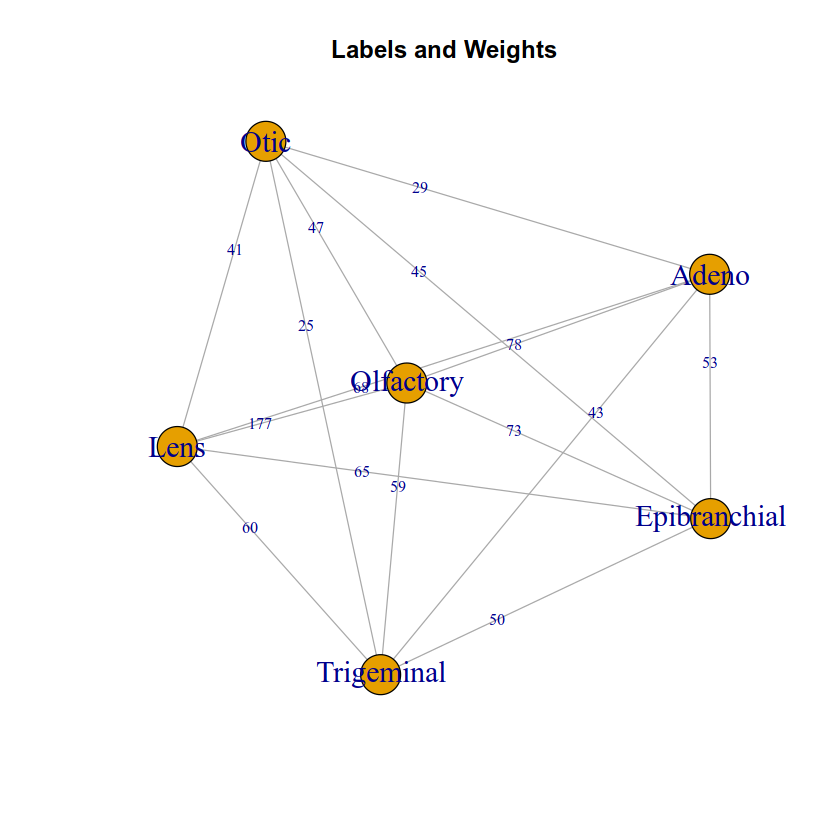

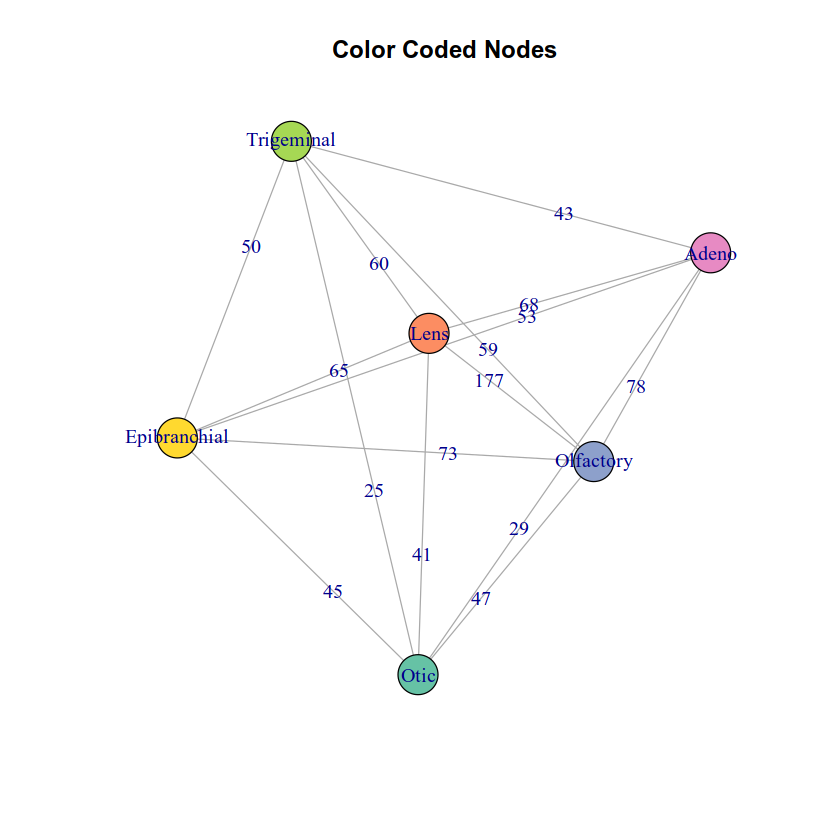

In [53]:
# Load required libraries
library(igraph)
library(RColorBrewer)

# Create matrix from the data
inter_df <- matrix(c(
  66, 41, 47, 29, 25, 45,
  41, 202, 177, 68, 60, 65,
  47, 177, 248, 78, 59, 73,
  29, 68, 78, 88, 43, 53,
  25, 60, 59, 43, 73, 50,
  45, 65, 73, 53, 50, 94
), nrow = 6, byrow = TRUE)

colnames(inter_df) <- rownames(inter_df) <- c("Otic", "Lens", "Olfactory", "Adeno", "Trigeminal", "Epibranchial")
g <- graph_from_adjacency_matrix(inter_df, mode = "undirected", weighted = TRUE, diag = FALSE)

# Labels emphasized, edge weights shown
E(g)$label <- round(E(g)$weight, 1)
plot(g, layout = layout_with_fr(g), vertex.label.cex = 1.5, edge.label.cex = 0.8, main = "Labels and Weights")

# Use RColorBrewer for vertex colors
V(g)$color <- brewer.pal(6, "Set2")
plot(g, layout = layout_with_fr(g), main = "Color Coded Nodes")




# ON all Genes 

# ON tfs all

# 2: Find the genes common across all datasets

In [54]:
head(Epibranchial_df, n=3)

,Epibranchial_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,0610010K14Rik,6,Epibranchial_all
2,0610030E20Rik,6,Epibranchial_all
3,0610040J01Rik,14,Epibranchial_all


In [55]:
head(Trigeminial_df, n=2)

,Trigeminial_genes,phylostratum,type
,<chr>,<int>,<chr>
1,0610010K14Rik,6,Trigeminial_all
2,0610030E20Rik,6,Trigeminial_all


In [56]:
Epi_genes<-Epibranchial_df$Epibranchial_cl_genes
length(Epi_genes)

Otic_genes<-Otic_df$Otic_cl_genes
length(Otic_genes)

Lens_genes<-Lens_df$Lens_cl_genes
length(Lens_genes)

Olfactory_genes<-Olfactory_df$Olfactory_cl_genes
length(Olfactory_genes)

Adenohypophyseal_genes<-Adenohypophyseal_df$Adenohypophyseal_cl_genes
length(Adenohypophyseal_genes)

Trigeminial_genes<-Trigeminial_df$Trigeminial_genes
length(Trigeminial_genes)



[1] 9287

[1] 9131

[1] 10223

[1] 10501

[1] 9065

[1] 9055

In [57]:
common_genes <- Reduce(intersect, list(Epi_genes, Trigeminial_genes, Adenohypophyseal_genes, Olfactory_genes, Lens_genes, Otic_genes))
length(common_genes)

[1] 8545

In [58]:
# Step 2: Remove the common genes from each dataset
Otic_genes_list_cleaned <- setdiff(Otic_genes, common_genes)
length(Otic_genes_list_cleaned)

Lens_genes_list_cleaned <- setdiff(Lens_genes, common_genes)
length(Lens_genes_list_cleaned)

Olfactory_genes_list_cleaned <- setdiff(Olfactory_genes, common_genes)
length(Olfactory_genes_list_cleaned)

Adeno_genes_list_cleaned <- setdiff(Adenohypophyseal_genes, common_genes)
length(Adeno_genes_list_cleaned)

Trygem_genes_list_cleaned <- setdiff(Trigeminial_genes, common_genes)
length(Trygem_genes_list_cleaned)

Epi_genes_list_cleaned <- setdiff(Epi_genes, common_genes)
length(Epi_genes_list_cleaned)

[1] 583

[1] 1675

[1] 1953

[1] 517

[1] 507

[1] 739

In [59]:
otic_lens<-intersect(Otic_genes_list_cleaned,Lens_genes_list_cleaned)
length(otic_lens)

[1] 428

In [60]:
# Create a list of cleaned gene sets
gene_lists <- list(
  Otic = Otic_genes_list_cleaned,
  Lens = Lens_genes_list_cleaned,
  Olfactory = Olfactory_genes_list_cleaned,
  Adeno = Adeno_genes_list_cleaned,
  Trigeminal = Trygem_genes_list_cleaned,
  Epibranchial = Epi_genes_list_cleaned
)


In [61]:
# Initialize an empty matrix
n <- length(gene_lists)
common_matrix_genes <- matrix(0, nrow = n, ncol = n)
rownames(common_matrix_genes) <- colnames(common_matrix_genes) <- names(gene_lists)


In [62]:
# Fill the matrix with intersection sizes
for (i in 1:n) {
  for (j in 1:n) {
    common_matrix_genes[i, j] <- length(intersect(gene_lists[[i]], gene_lists[[j]]))
  }
}


In [63]:
common_matrix_genes

,Otic,Lens,Olfactory,Adeno,Trigeminal,Epibranchial
Otic,583,428,495,215,182,391
Lens,428,1675,1410,405,436,599
Olfactory,495,1410,1953,481,440,638
Adeno,215,405,481,517,220,323
Trigeminal,182,436,440,220,507,375
Epibranchial,391,599,638,323,375,739


In [64]:
# Create the graph from the matrix
g <- graph_from_adjacency_matrix(common_matrix_genes, mode = "undirected", weighted = TRUE, diag = FALSE)


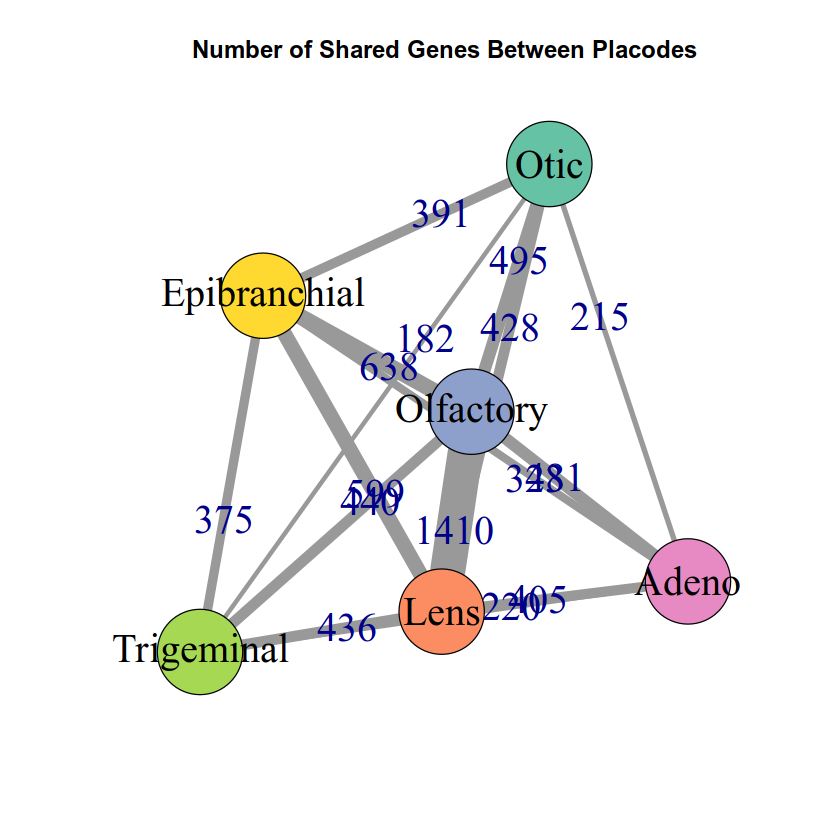

In [65]:
library(igraph)
library(RColorBrewer)

# Assume `common_matrix_genes` is already defined in your environment

# Set the diagonal to 0 if you want only inter-placodal overlaps
diag(common_matrix_genes) <- 0

# Create graph from matrix
g_genes <- graph_from_adjacency_matrix(common_matrix_genes, mode = "undirected", weighted = TRUE, diag = FALSE)

# Visualize with edge labels and weights
plot(
  g_genes,
  layout = layout_with_fr(g_genes),           # Force-directed layout
  edge.width = E(g_genes)$weight / 50,        # Scale edge width by gene overlap
  edge.label = E(g_genes)$weight,             # Show actual gene count
  edge.label.cex = 2,                        # Font size for edge labels
  vertex.size = 35,                            # Node size
  vertex.label.cex =2,                      # Node label size
  vertex.label.color = "black",                # Node label color
  vertex.color = brewer.pal(6, "Set2"),        # Use distinct colors
  edge.color = "gray60",                       # Edge color
  main = "Number of Shared Genes Between Placodes"
)


In [66]:
# Step 1: Find the maximum length
max_len <- max(
  length(Otic_genes_list_cleaned),
  length(Lens_genes_list_cleaned),
  length(Olfactory_genes_list_cleaned),
  length(Adeno_genes_list_cleaned),
  length(Trygem_genes_list_cleaned),
  length(Epi_genes_list_cleaned)
)

# Step 2: Define a padding function
pad_na <- function(x, n) {
  length(x) <- n
  return(x)
}

# Step 3: Pad and create the data frame
gene_df <- data.frame(
  Otic = pad_na(Otic_genes_list_cleaned, max_len),
  Lens = pad_na(Lens_genes_list_cleaned, max_len),
  Olfactory = pad_na(Olfactory_genes_list_cleaned, max_len),
  Adeno = pad_na(Adeno_genes_list_cleaned, max_len),
  Trygem = pad_na(Trygem_genes_list_cleaned, max_len),
  Epi = pad_na(Epi_genes_list_cleaned, max_len),
  stringsAsFactors = FALSE
)

# Step 4: View the result
head(gene_df, n=3)


,Otic,Lens,Olfactory,Adeno,Trygem,Epi
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0610040J01Rik,0610040J01Rik,0610040J01Rik,1190005I06Rik,1190005I06Rik,0610040J01Rik
2,1700019D03Rik,1190005I06Rik,1190005I06Rik,1810009A15Rik,4930512B01Rik,1190005I06Rik
3,2510046G10Rik,1600014C10Rik,1600014C10Rik,2510046G10Rik,4930523C07Rik,1700010I14Rik


In [67]:
# Step 5: Save the data frame to CSV
write.csv(gene_df, file = "cleaned_gene_lists_04_06.csv", row.names = FALSE)


# For phylostrat

In [68]:
head(Epibranchial_df, n=2)

,Epibranchial_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,0610010K14Rik,6,Epibranchial_all
2,0610030E20Rik,6,Epibranchial_all


# Epi_genes_list_cleaned

In [69]:
# Subset the dataframe based on the list of genes
Epi_df_subset <- Epibranchial_df[Epibranchial_df$Epibranchial_cl_genes %in% Epi_genes_list_cleaned, ]
head(Epi_df_subset, n=2)


,Epibranchial_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
3,0610040J01Rik,14,Epibranchial_all
10,1190005I06Rik,15,Epibranchial_all


In [70]:
# Select specific columns by name
Epi_df_subset1 <- Epi_df_subset[, c("phylostratum", "type")]
# View the subset
head(Epi_df_subset1, n=2)

,phylostratum,type
,<int>,<chr>
3,14,Epibranchial_all
10,15,Epibranchial_all


# Adeno_genes_list_cleaned

In [71]:
head(Adenohypophyseal_df, n=2)

,Adenohypophyseal_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,0610010K14Rik,6,Adenohypophyseal_all
2,0610030E20Rik,6,Adenohypophyseal_all


In [72]:
Adeno_df_subset <- Adenohypophyseal_df[Adenohypophyseal_df$Adenohypophyseal_cl_genes %in% Adeno_genes_list_cleaned, ]
head(Adeno_df_subset, n=2)

,Adenohypophyseal_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
9,1190005I06Rik,15,Adenohypophyseal_all
19,1810009A15Rik,6,Adenohypophyseal_all


In [73]:
Adeno_df_subset1 <- Adeno_df_subset[, c("phylostratum", "type")]
# View the subset
head(Adeno_df_subset1, n=2)

,phylostratum,type
,<int>,<chr>
9,15,Adenohypophyseal_all
19,6,Adenohypophyseal_all


# Lens_genes_list_cleaned

In [74]:
Lens_df_subset <- Lens_df[Lens_df$Lens_cl_genes %in% Lens_genes_list_cleaned, ]

head(Lens_df_subset, n=2)
# Select specific columns by name
Lens_df_subset1 <- Lens_df_subset[, c("phylostratum", "type")]
# View the subset
head(Lens_df_subset1, n=2)

,Lens_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
3,0610040J01Rik,14,Lens_all
10,1190005I06Rik,15,Lens_all


,phylostratum,type
,<int>,<chr>
3,14,Lens_all
10,15,Lens_all


# Otic_genes_list_cleaned

In [75]:
head(Otic_df, n=2)

,Otic_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
1,0610010K14Rik,6,Otic_all
2,0610030E20Rik,6,Otic_all


In [76]:
Otic_df_subset <- Otic_df[Otic_df$Otic_cl_genes %in% Otic_genes_list_cleaned, ]
# View the resulting subset
head(Otic_df_subset, n=2)
# Select specific columns by name
Otic_df_subset1 <- Otic_df_subset[, c("phylostratum", "type")]
# View the subset
head(Otic_df_subset1, n=2)

,Otic_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
3,0610040J01Rik,14,Otic_all
14,1700019D03Rik,12,Otic_all


,phylostratum,type
,<int>,<chr>
3,14,Otic_all
14,12,Otic_all


# Epi_genes_list_cleaned

In [77]:
Epi_df_subset <- Epibranchial_df[Epibranchial_df$Epibranchial_cl_genes %in% Epi_genes_list_cleaned, ]

head(Epi_df_subset, n=2)
# Select specific columns by name
Epi_df_subset1 <- Epi_df_subset[, c("phylostratum", "type")]
# View the subset
head(Epi_df_subset1, n=2)

,Epibranchial_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
3,0610040J01Rik,14,Epibranchial_all
10,1190005I06Rik,15,Epibranchial_all


,phylostratum,type
,<int>,<chr>
3,14,Epibranchial_all
10,15,Epibranchial_all


# Olfactory

In [78]:
Olfactory_df_subset <- Olfactory_df[Olfactory_df$Olfactory_cl_genes %in% Olfactory_genes_list_cleaned, ]
# View the resulting subset
head(Olfactory_df_subset, n=2)
# Select specific columns by name
Olfactory_df_subset1 <- Olfactory_df_subset[, c("phylostratum", "type")]
# View the subset
head(Olfactory_df_subset1, n=2)

,Olfactory_cl_genes,phylostratum,type
,<chr>,<int>,<chr>
3,0610040J01Rik,14,Olfactory_all
10,1190005I06Rik,15,Olfactory_all


,phylostratum,type
,<int>,<chr>
3,14,Olfactory_all
10,15,Olfactory_all


# Trigeminial

In [79]:
head(Trigeminial_df, n=2)

,Trigeminial_genes,phylostratum,type
,<chr>,<int>,<chr>
1,0610010K14Rik,6,Trigeminial_all
2,0610030E20Rik,6,Trigeminial_all


In [80]:
# Subset the dataframe based on the list of genes
Trigeminial_df_subset <- Trigeminial_df[Trigeminial_df$Trigeminial_genes %in% Trygem_genes_list_cleaned, ]
# View the resulting subset
head(Trigeminial_df_subset)
# Select specific columns by name
Trygem_df_subset1 <- Trigeminial_df_subset[, c("phylostratum", "type")]
# View the subset
head(Trygem_df_subset1, n=2)

,Trigeminial_genes,phylostratum,type
,<chr>,<int>,<chr>
9,1190005I06Rik,15,Trigeminial_all
59,4930512B01Rik,20,Trigeminial_all
61,4930523C07Rik,14,Trigeminial_all
79,A430033K04Rik,2,Trigeminial_all
80,A730049H05Rik,20,Trigeminial_all
85,AI661453,3,Trigeminial_all


,phylostratum,type
,<int>,<chr>
9,15,Trigeminial_all
59,20,Trigeminial_all


# GENES cleaned

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


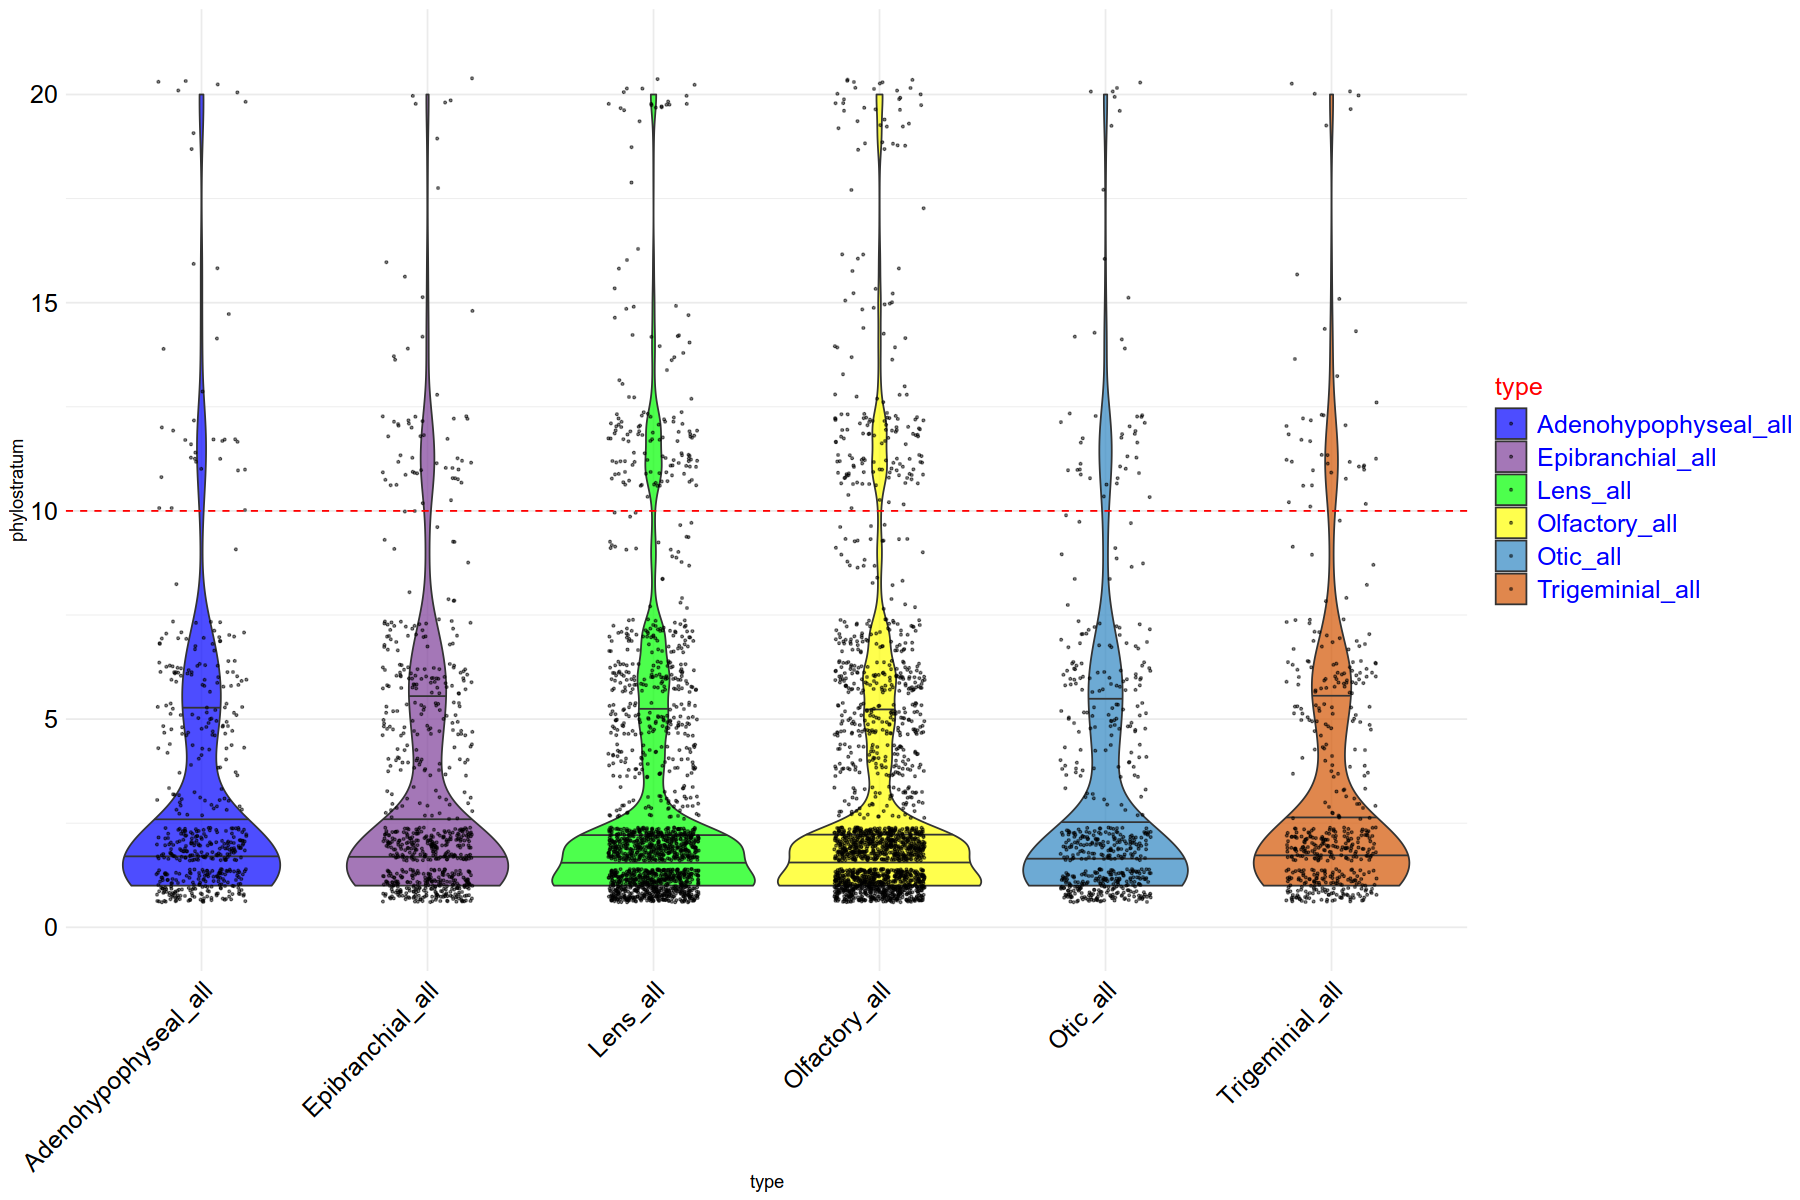

In [81]:
ombined_df <- rbind(Epi_df_subset1, Adeno_df_subset1, Lens_df_subset1, Otic_df_subset1, Olfactory_df_subset1,
Trygem_df_subset1
                    # RPE_filostr_Tfs,RPE_filostr_genes,Mel_filostr_genes,MEL_RPE_genes_filostr,
                     # ascid
                    #  RPE.marker_filostr,RPE_Mel_intersect_filostr_genes
                     )

options(repr.plot.height =10, repr.plot.width = 15)
pos <-ggplot(ombined_df, aes(x = type, y = phylostratum, fill = type)) +
  geom_violin(draw_quantiles = c(0.25, 0.5, 0.75), alpha = 0.7) +
  geom_jitter(position = position_jitter(width = 0.2), size = 0.5, alpha = 0.5) +
  scale_fill_manual(values = c(   "blue", "#7d3c98",
  "green",
   "yellow",
"#2e86c1",
 "#d35400")) +
  theme_minimal() +
  coord_cartesian(ylim = c(0, 21)) +
  scale_y_continuous(breaks = seq(0, 21, by = 5)) +
  theme(legend.title = element_text(color = "red", size = 15),  # Change legend title color and size
        legend.text = element_text(color = "blue", size = 15),   # Change legend text color and size
        legend.key.size = unit(0.7, "cm"),  # Change legend key size
        axis.text.x = element_text(size = 15, angle = 45, hjust = 1, color = "black"),  # Change x-axis text size, angle, alignment, and color
        axis.text.y = element_text(size = 15, color = "black")) +  # Change y-axis text size and color
  geom_hline(yintercept = 10, linetype = "dashed", color = "red", size = 0.5)  # Add horizontal line at y = 20
pos
ggsave("phylostratum_violin_plot_smaller_1.svg", plot = pos, device = "svg", width = 15, height = 10, units = "in")


In [82]:
head(gene_df, n=2)

,Otic,Lens,Olfactory,Adeno,Trygem,Epi
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0610040J01Rik,0610040J01Rik,0610040J01Rik,1190005I06Rik,1190005I06Rik,0610040J01Rik
2,1700019D03Rik,1190005I06Rik,1190005I06Rik,1810009A15Rik,4930512B01Rik,1190005I06Rik
